In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from dotenv import load_dotenv
import os
from pydantic import BaseModel, Field
import operator

In [2]:
Api_key = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(
    model="openai/gpt-4o-mini",
    base_url="https://openrouter.ai/api/v1",
    api_key= Api_key
)

In [3]:
class EvalutionSchema(BaseModel):
    feedback: str = Field(..., description="Detailed Feedback on the essay")
    score: int = Field(..., description="Score out of 100 for the essay", ge=0, le=100)\
    


In [4]:
structured_model = model.with_structured_output(EvalutionSchema)

In [5]:
eassy = """"**Title: Artificial Intelligence and Humanity: Navigating the Dawn of a New Epoch**

**Introduction**
The rapid ascent of Artificial Intelligence (AI) serves as the defining technological narrative of the 21st century. Russian President Vladimir Putin once remarked, *"Whoever becomes the leader in this sphere will become the ruler of the world."* This statement underscores the geopolitical weight of AI, but its impact extends far beyond power dynamics—it touches the very fabric of human existence. From revolutionizing healthcare to challenging our understanding of creativity and consciousness, AI acts as a "double-edged sword." It promises unprecedented efficiency and solutions to global crises while simultaneously posing existential risks to privacy, employment, and human agency. As humanity stands at this crossroads, the discourse must shift from mere adoption to **responsible integration**.

---

### **The Economic Impact: A Paradigm Shift**

AI is arguably the significant distinct factor of the **Fourth Industrial Revolution**.

* **Productivity and Growth:** Economically, AI is a force multiplier. Reports from **Goldman Sachs** suggest that generative AI could raise global GDP by 7% (nearly $7 trillion) over a 10-year period. By automating routine tasks—ranging from data entry to complex financial modeling—AI frees human capital to focus on innovation and strategy.
* **The Labor Market Paradox:** However, this efficiency comes at a cost. The **World Economic Forum (WEF)** predicts that while AI will displace 85 million jobs by 2025, it may create 97 million new ones. The challenge lies in the *transition*. Blue-collar jobs are no longer the only ones at risk; white-collar roles in coding, legal analysis, and content creation are facing the heat of automation. This threatens to exacerbate **income inequality**, creating a divide between those who own the algorithms and those replaced by them.

---

### **Social and Ethical Implications: The Human Cost**

The social integration of AI brings benefits that were once science fiction, yet it also introduces "algorithmic anxieties."

1. **Healthcare Revolution:** AI's ability to analyze medical imaging (radiology) often surpasses human accuracy, leading to early detection of cancers and diabetic retinopathy. The **DeepMind AlphaFold** breakthrough in predicting protein structures has accelerated drug discovery by decades.
2. **The "Black Box" Problem:** A critical ethical challenge is the lack of transparency. AI often operates as a "Black Box," where decisions (e.g., loan rejections or judicial sentencing recommendations) are made without a traceable rationale. This opacity undermines the **Right to Explanation**, a fundamental tenet of natural justice.
3. **Bias and Discrimination:** AI systems learn from historic data. If that data contains societal biases (racism, sexism, casteism), the AI amplifies them. Facial recognition technologies have famously shown higher error rates for women and people of color, leading to wrongful arrests and surveillance concerns.

---

### **Geopolitical and Security Dimensions**

* **Digital Sovereignty:** Nations are racing to build "Sovereign AI" to avoid dependence on foreign tech giants (Digital Colonization). The control of data centers and semiconductor supply chains has become a matter of national security.
* **Weaponization of Information:** The rise of **Deepfakes** threatens the integrity of democratic processes. The "Liar’s Dividend"—where bad actors can dismiss real evidence as fake—erodes public trust in truth. In warfare, the development of **Lethal Autonomous Weapons Systems (LAWS)** raises the moral question: *Should an algorithm be allowed to take a human life?*

---

### **The Indian Context: Challenges and Opportunities**

For India, AI is not just a buzzword but a tool for developmental leapfrogging.

* **AI for All (NITI Aayog):** India’s strategy focuses on inclusion.
* *Agriculture:* AI-powered predictive analysis helps farmers with weather patterns and crop diseases, crucial for a country where ~45% of the workforce is in agriculture.
* *Governance:* Digital Public Infrastructure (DPI) like **Bhashini** (AI translation tool) is breaking language barriers, democratizing access to government services for non-English speakers.


* **Structural Challenges:**
* **Data Poverty:** While India generates vast data, much of it is unstructured and non-machine-readable.
* **R&D Lag:** India’s investment in AI research is a fraction of that of the US or China.
* **Skill Gap:** There is an urgent need to reskill the demographic dividend to prevent it from becoming a demographic burden.



---

### **Way Forward**

To harness AI for the greater good, a multi-pronged approach is required:

1. **Global Regulation:** We need a "Geneva Convention for AI." Frameworks like the **EU AI Act** or the **Bletchley Declaration** are good starts, but a global consensus on "Red Lines" (e.g., banning AI in nuclear command and control) is essential.
2. **Ethical AI by Design:** Ethics must not be an afterthought. Developers must integrate fairness, accountability, and transparency (FAT) principles into the coding process itself.
3. **Human-in-the-Loop (HITL):** Critical decisions affecting life and liberty must always retain human oversight to ensure empathy and moral reasoning, which machines lack.

### **Conclusion**

AI is a tool of unprecedented power, but it remains a tool. As **Stephen Hawking** warned, *"The development of full artificial intelligence could spell the end of the human race... or the best thing that has ever happened to us."* The outcome depends on our ability to govern it. The future belongs not to those who fight against the machine, but to those who humanize it—ensuring that technology serves as a ladder for human empowerment rather than a substitute for human agency."""

In [6]:
prompt = f"""You are an expert evaluator for UPSC essays. Evaluate the language quality of the following essay and provide
a detailed feedback along with a score out of 100. \n{eassy}"""
response = structured_model.invoke(prompt)
print("Feedback:", response.feedback)
print("Score:", response.score)

Feedback: This essay presents a thorough exploration of the impact of Artificial Intelligence (AI) on various facets of humanity, particularly emphasizing its economic, social, ethical, geopolitical, and developmental aspects. The title aptly reflects the subject matter and sets the stage well. 

**Strengths:**
1. **Clarity and Structure:** The essay is logically structured with clear headings, allowing the reader to follow the argument effortlessly. Each section seamlessly transitions to the next, maintaining coherence throughout.
2. **Relevance and Depth:** It effectively covers relevant topics, including the economic benefits of AI, ethical dilemmas, and the geopolitical implications, providing a comprehensive look at the subject. The inclusion of statistical data and references to reputable sources like Goldman Sachs, WEF, and DeepMind enhance credibility.
3. **Language & Style:** The language used is sophisticated yet accessible, appropriate for an academic setting. The use of quo

In [7]:
class UPSC(TypedDict):
    essay: str  
    DOA : dict
    LA : dict
    COT : dict
    individual_score : Annotated[list[int], operator.add]
    overall_score : int
    summary : str

In [8]:
def DOA(state : UPSC ) -> dict:
    prompt = f"Evaluate the depth of analysis of the following essay and provide a score out of 100.\n {state['essay']}"
    response = structured_model.invoke(prompt)  
    return {
        "DOA" : {"score": response.score, "feedback": response.feedback}
    }

In [9]:
def LA(state : UPSC) -> dict:
    prompt = f"Evaluate the Language analyis of the following eassay and score out of 100 . \n {state['essay']}"
    response = structured_model.invoke(prompt)
    return {
        "LA" : {"score": response.score, "feedback": response.feedback}
    }

In [10]:
def COT(state : UPSC) -> dict:
    prompt = f"Evaluate the clarity of Thought of the following eassay and score out of 100 . \n {state['essay']}"
    response = structured_model.invoke(prompt)
    return {
        "COT" : {"score": response.score, "feedback": response.feedback}
    }

In [11]:
def individual_score(state: UPSC):
    Cot = state["COT"]["score"]
    La = state["LA"]["score"]
    Doa = state["DOA"]["score"]
    return {"individual_score": [Cot, La, Doa]}

In [12]:
def overall_score(state: UPSC):
    scores = state["individual_score"]
    return {"overall_score": sum(scores) // len(scores)}

In [13]:
def summary(state : UPSC) -> dict:
    prompt = f"Based on the following evaluations, provide a concise summary of the essay's strengths and areas for improvement. \n Depth of Analysis Feedback: {state['DOA']['feedback']} \n Language Analysis Feedback: {state['LA']['feedback']} \n Clarity of Thought Feedback: {state['COT']['feedback']}"
    response = model.invoke(prompt)
    return {
        "summary" : response.content
    }

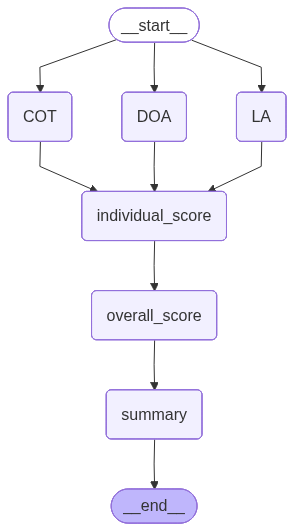

In [19]:
graph = StateGraph(UPSC)
    # 1. Add ALL Nodes first
graph.add_node("DOA", DOA)
graph.add_node("LA", LA)
graph.add_node("COT", COT)
graph.add_node("individual_score", individual_score)
graph.add_node("overall_score", overall_score)
graph.add_node("summary", summary)
    # 2. Define Edges
graph.add_edge(START, "DOA")
graph.add_edge(START, "LA")
graph.add_edge(START, "COT")
    
    # Connect parallel nodes to individual_score
graph.add_edge("DOA", "individual_score")
graph.add_edge("LA", "individual_score")
graph.add_edge("COT", "individual_score")
    
graph.add_edge("individual_score", "overall_score")
graph.add_edge("overall_score", "summary")
graph.add_edge("summary", END)
    # 3. Compile
workflow = graph.compile()
workflow

In [20]:
initial_state = {
    "essay": eassy,
}
final_stage = workflow.invoke(initial_state)
final_stage

{'essay': '"**Title: Artificial Intelligence and Humanity: Navigating the Dawn of a New Epoch**\n\n**Introduction**\nThe rapid ascent of Artificial Intelligence (AI) serves as the defining technological narrative of the 21st century. Russian President Vladimir Putin once remarked, *"Whoever becomes the leader in this sphere will become the ruler of the world."* This statement underscores the geopolitical weight of AI, but its impact extends far beyond power dynamics—it touches the very fabric of human existence. From revolutionizing healthcare to challenging our understanding of creativity and consciousness, AI acts as a "double-edged sword." It promises unprecedented efficiency and solutions to global crises while simultaneously posing existential risks to privacy, employment, and human agency. As humanity stands at this crossroads, the discourse must shift from mere adoption to **responsible integration**.\n\n---\n\n### **The Economic Impact: A Paradigm Shift**\n\nAI is arguably the 

In [ ]:
print(f"{final_stage['summary']} \n {final_stage['overall_score']} \n {final_stage['individual_score']}")

**Summary of Strengths:**

1. **Depth of Analysis**: The essay provides a thorough exploration of artificial intelligence, examining its economic, social, ethical, and geopolitical implications. It effectively presents a well-defined thesis on the dual nature of AI and the need for responsible integration into society.

2. **Rich Content**: The inclusion of statistics, well-elaborated ethical considerations, and a unique focus on the Indian context adds depth and relevance to the discussion.

3. **Clarity and Engaging Language**: The language used is coherent and engages the reader, with a logical structure that transitions from one topic to another effectively.

4. **Strong Conclusion**: The essay concludes with a clear call to action, outlining necessary steps for governance and ethics related to AI.

**Areas for Improvement:**

1. **Incorporation of Expert Opinions**: The inclusion of more varied expert opinions or case studies could enhance the depth and credibility of arguments pr